In [1]:
#pandas is a powerful library for data analysis and manipulation
import pandas as pd

In [3]:
#reads csv file and store the data in a dataframe object
df = pd.read_csv('spam.csv')

#first few rows of the dataframe
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Groups the dataframe by 'Category' column and calculates descriptive statistics for each group
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
#Creates a new column 'spam' in the DataFrame df and assigns a value of 1 if the 'Category' is 'spam' and 0 otherwise
df['spamORnot'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,spamORnot
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [9]:
#splits the 'Message' and 'spamORnot' columns of the DataFrame df into training and testing sets, with 20% of the data used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spamORnot,test_size=0.2)

In [10]:
#CountVectorizer class is used for converting text into numerical feature vectors
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
v = CountVectorizer() #initializes countvectorizer object

#Fits the CountVectorizer to the training data
# and transforms it into a matrix of word counts where each row corresponds to a
# document and each column corresponds to a token (word) from the vocabulary.
X_train_count = v.fit_transform(X_train.values)

#converts the sparse matrix into a dense numpy array
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [12]:
#Implements the Multinomial Naive Bayes algorithm for classification
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

In [26]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?', #ham
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!', #spam
    '88066 FROM 88066 LOST 3POUND HELP', #spam
    'Lol enjoy role playing much?' #ham
]
#Transforms the email messages into a matrix of word counts using the previously fitted CountVectorizer
emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1, 1, 0])

In [27]:
#Transforms the testing data into a matrix of word counts
X_test_count = v.transform(X_test)

#Calculates the accuracy score of the model on the testing data
model.score(X_test_count, y_test)

0.989237668161435

In [28]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [29]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [30]:
clf.score(X_test,y_test)

0.989237668161435

In [31]:
clf.predict(emails)

array([0, 1, 1, 0])

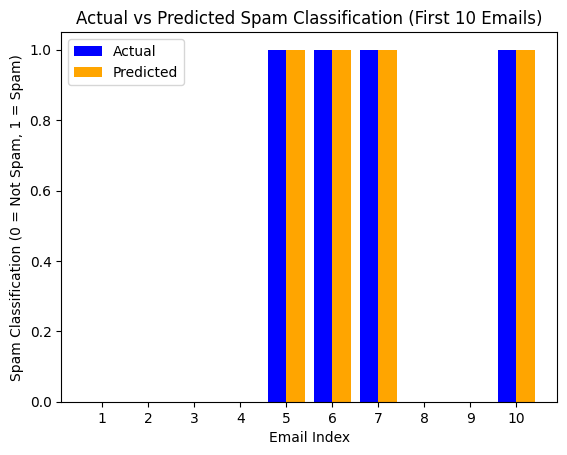

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model and X_test_count are already defined
# Predict the results for the test set
y_pred = model.predict(X_test_count[:10])
y_test = y_test[:10]

# Create an array of indices for plotting
indices = np.arange(len(y_test))

# Plot the actual results
plt.bar(indices - 0.2, y_test, width=0.4, label='Actual', color='blue')

# Plot the predicted results
plt.bar(indices + 0.2, y_pred, width=0.4, label='Predicted', color='orange')

# Add labels and legend
plt.xlabel('Email Index')
plt.ylabel('Spam Classification (0 = Not Spam, 1 = Spam)')
plt.title('Actual vs Predicted Spam Classification (First 10 Emails)')
plt.xticks(indices, indices + 1)
plt.legend()

# Show the plot
plt.show()

